In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


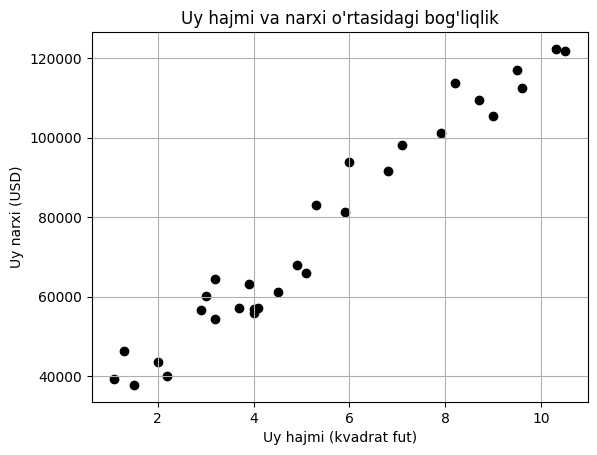

In [35]:
plt.scatter(data["YearsExperience"], data["Salary"], color="black")
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik")
plt.xlabel("Uy hajmi (kvadrat fut)")
plt.ylabel("Uy narxi (USD)")
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = data.iloc[:, :-1].values
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [ ]:
y = data.iloc[:, -1].values
y[:5]

array([39343., 46205., 37731., 43525., 39891.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
print(X_train.shape)
X_train[:5]

(24, 1)


array([[10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1],
       [ 2.2]])

In [ ]:
print(y_train.shape)
y_train

(24,)


array([122391., 109431.,  56957.,  39343.,  39891.,  66029.,  56642.,
        57081.,  55794., 101302.,  46205.,  37731., 105582.,  43525.,
        98273., 116969.,  81363., 121872.,  91738.,  54445.,  63218.,
        61111.,  93940.,  60150.])

In [ ]:
print(X_test.shape)
X_test

(6, 1)


array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2],
       [3.7]])

In [ ]:
print(y_test.shape)
y_test

(6,)


array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()

In [ ]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lrmodel.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [ ]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [ ]:
print("Intercept (Beta_0):", lrmodel.intercept_)
print("Slope (Beta_1):", lrmodel.coef_[0])

Intercept (Beta_0): 25321.583011776813
Slope (Beta_1): 9423.815323030976


In [ ]:
natija = pd.DataFrame({"Xaqiqiy": y_test, "Bashorat": y_pred})
natija

,Xaqiqiy,Bashorat
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("O'rtacha absalyut xato (MSE):", mae)

O'rtacha absalyut xato (MSE): 6286.453830757749


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("O'rtacha kvadratik xato (MSE):", mse)

O'rtacha kvadratik xato (MSE): 49830096.85590839


In [ ]:
rmse = pow(mse, 1/2)
rmse

7059.04362190151

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-kvadrat (R^2):", r2)

R-kvadrat (R^2): 0.9024461774180497


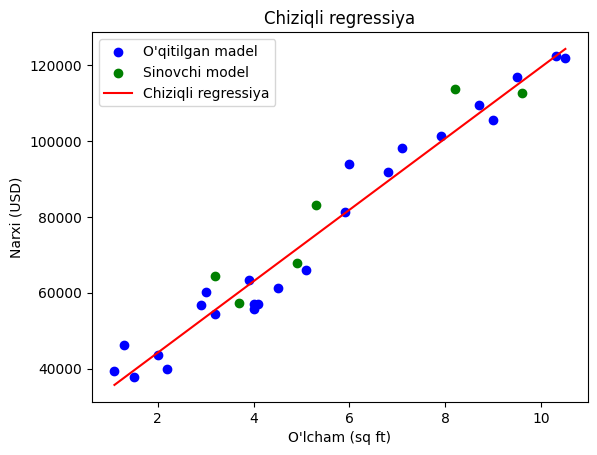

In [ ]:
plt.scatter(X_train, y_train, color="blue", label="O'qitilgan madel")
plt.scatter(X_test, y_test, color="green", label="Sinovchi model")
plt.plot(X, lrmodel.predict(X), color="red", label="Chiziqli regressiya")
plt.title("Chiziqli regressiya")
plt.xlabel("O'lcham (sq ft)")
plt.ylabel("Narxi (USD)")
plt.legend()
plt.show()